# This is Jeopardy!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)

In [2]:
jeo = pd.read_csv('jeopardy.csv')
jeo.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,"The city of Yuma in this state has a record average of 4,055 hours of sunshine each year",Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", this company served its billionth burger",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States",John Adams


In [3]:
jeo.columns = [col.strip() for col in jeo.columns]

2. Write a function that filters the dataset for questions that contains all of the words in a list of words. For example, when the list `["King", "England"]` was passed to our function, the function returned a DataFrame of 49 rows. Every row had the strings `"King"` and `"England"` somewhere in its `" Question"`.

   Test your function by printing out the column containing the question of each row of the dataset.

In [4]:
def filter_words(lst):
    return jeo[jeo.Question.apply(lambda x: all(word in x for word in lst))]

filter_words(['England','King']).shape

(49, 7)

3. Test your original function with a few different sets of words to try to find some ways your function breaks. Edit your function so it is more robust.

   For example, think about capitalization. We probably want to find questions that contain the word `"King"` or `"king"`.
   
   You may also want to check to make sure you don't find rows that contain substrings of your given words. For example, our function found a question that didn't contain the word `"king"`, however it did contain the word `"viking"` &mdash; it found the `"king"` inside `"viking"`. Note that this also comes with some drawbacks &mdash; you would no longer find questions that contained words like `"England's"`.

In [5]:
def filter_words(data, lst):
    return data[data.Question.apply(lambda x: all(any(word.lower() == w for w in x.lower().split()) for word in lst))]

filter_words(jeo, ['England','King'])

,Show Number,Air Date,Round,Category,Value,Question,Answer
6337,3517,1999-12-14,Double Jeopardy!,Y1K,$800,"In retaliation for Viking raids, this ""Unready"" king of England attacks Norse areas of the Isle of Man",Ethelred
9191,3907,2001-09-04,Double Jeopardy!,WON THE BATTLE,$800,This king of England beat the odds to trounce the French in the 1415 Battle of Agincourt,Henry V
13454,4726,2005-03-07,Jeopardy!,A NUMBER FROM 1 TO 10,$1000,It's the number that followed the last king of England named William,4
14912,2832,1996-12-17,Jeopardy!,WORLD HISTORY,$100,"This country's King Louis IV was nicknamed ""Louis From Overseas"" because he was raised in England",France
18076,3227,1998-09-22,Double Jeopardy!,WORLD HISTORY,$1000,In 1199 this crusader king of England was mortally wounded while besieging the castle of Chalus,Richard the Lionhearted
...,...,...,...,...,...,...,...
200369,2937,1997-05-13,Jeopardy!,BRITISH HISTORY,$200,8th C. King Offa built a 170-mile north-south dike that still partly marks the border of England & this country,Wales
201168,3515,1999-12-10,Jeopardy!,BEFORE & AFTER,$500,Popular Saint-Exupery character waiting around to become king of England,The Little Prince of Wales
208742,4863,2005-11-02,Double Jeopardy!,BEFORE & AFTER,"$3,000",Dutch-born king who ruled England jointly with Mary II & is a tasty New Zealand fish,William of Orange roughy
213870,5856,2010-02-15,Double Jeopardy!,URANUS,$1600,In 1781 William Herschel discovered Uranus & initially named it after this king of England,George III


4. We may want to eventually compute aggregate statistics, like `.mean()` on the `" Value"` column. But right now, the values in that column are strings. Convert the`" Value"` column to floats. If you'd like to, you can create a new column with float values.

   Now that you can filter the dataset of question, use your new column that contains the float values of each question to find the "difficulty" of certain topics. For example, what is the average value of questions that contain the word `"King"`?
   
   Make sure to use the dataset that contains the float values as the dataset you use in your filtering function.

In [6]:
replace_dict = {
    '$':'',
    ',':'',
    'None':'0'
}

for key, value in replace_dict.items():
    jeo.Value = jeo.Value.str.replace(key,value,regex=True)

jeo.Value = jeo.Value.astype(int)

In [7]:
jeo.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200,"The city of Yuma in this state has a record average of 4,055 hours of sunshine each year",Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200,"In 1963, live on ""The Art Linkletter Show"", this company served its billionth burger",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200,"Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States",John Adams


In [9]:
filter_words(jeo,['king']).Value.mean()

805.4698795180723

5. Write a function that returns the count of unique answers to all of the questions in a dataset. For example, after filtering the entire dataset to only questions containing the word `"King"`, we could then find all of the unique answers to those questions. The answer "Henry VIII" appeared 55 times and was the most common answer.

In [11]:
def unique_answers(data):
    return data.Answer.value_counts()

unique_answers(filter_words(jeo,['king']))

Henry VIII            41
Sweden                24
Solomon               23
Norway                22
Richard III           21
                      ..
"Song of Songs"        1
Boaz                   1
Corinth                1
eyebrows               1
Victor Emmanuel II     1
Name: Answer, Length: 1165, dtype: int64

6. Explore from here! This is an incredibly rich dataset, and there are so many interesting things to discover. There are a few columns that we haven't even started looking at yet. Here are some ideas on ways to continue working with this data:

 * Investigate the ways in which questions change over time by filtering by the date. How many questions from the 90s use the word `"Computer"` compared to questions from the 2000s?
 * Is there a connection between the round and the category? Are you more likely to find certain categories, like `"Literature"` in Single Jeopardy or Double Jeopardy?
 * Build a system to quiz yourself. Grab random questions, and use the <a href="https://docs.python.org/3/library/functions.html#input">input</a> function to get a response from the user. Check to see if that response was right or wrong.

## Solution

In [12]:
jeo['Year'] = pd.to_datetime(jeo['Air Date']).dt.year
jeo.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,Year
0,4680,2004-12-31,Jeopardy!,HISTORY,200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",Copernicus,2004
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",Jim Thorpe,2004
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200,"The city of Yuma in this state has a record average of 4,055 hours of sunshine each year",Arizona,2004
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200,"In 1963, live on ""The Art Linkletter Show"", this company served its billionth burger",McDonald's,2004
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200,"Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States",John Adams,2004


In [13]:
filter_words(jeo[jeo.Year.between(1990,1999)], ['Computer'])

,Show Number,Air Date,Round,Category,Value,Question,Answer,Year
5077,3480,1999-10-22,Double Jeopardy!,19th CENTURY LITERATURE,500,"Edward Bellamy's 1888 book ""Looking Backward"" sends a man to this year & doesn't mention computer bugs",2000,1999
18795,3175,1998-05-22,Double Jeopardy!,GREEK LETTERS,1000,Computer games & programs undergo this test period to work out bugs before their final retail release,Beta testing,1998
20837,3118,1998-03-04,Jeopardy!,"GO TO ""H""",200,"At best, it's a computer enthusiast; at worst, it's one who illegally taps into your computer",Hacker,1998
22502,2874,1997-02-13,Jeopardy!,BUSINESS & INDUSTRY,200,This company's new computer products include the Aptiva S & the Thinkpad 560,IBM,1997
26354,3494,1999-11-11,Double Jeopardy!,TECH BUSINESS & INDUSTRY,1000,Linus Torvalds developed this upstart computer operating system that's usually available at no cost,Linux,1999
...,...,...,...,...,...,...,...,...
209897,2676,1996-04-01,Jeopardy!,APRIL FOOLS' DAY,200,"The ""core"" of this computer company goes back to its founding, April 1, 1976",Apple Computer,1996
211882,3224,1998-09-17,Double Jeopardy!,WORD ORIGINS,200,"Derived from the Greek for ""throw"", you can throw a floppy one into a computer & store a file",a disk,1998
212789,2871,1997-02-10,Double Jeopardy!,ESSAYS,800,"This humorist's collection of essays ""In Cyberspace"" is formatted like a computer manual",Dave Barry,1997
216527,3038,1997-11-12,Jeopardy!,COMPUTERESE,400,"Like a waiter, a network computer might say ""I'll be your"" this & store files or manage printers",Server,1997


In [14]:
filter_words(jeo[jeo.Year.between(2000,2009)], ['Computer'])

,Show Number,Air Date,Round,Category,Value,Question,Answer,Year
342,5690,2009-05-08,Double Jeopardy!,MATHEM-ATTACK!,1200,"(<a href=""http://www.j-archive.com/media/2009-05-08_DJ_28.jpg"" target=""_blank"">Kelly of the Clue Crew shows an array of numbers enclosed in brackets on the monitor.</a>) A set of numbers in rows and columns can be used in many ways--for example, to encrypt a code or create 3-D computer graphics; the set shares this name with a 1999 film",a matrix,2009
1106,4085,2002-05-10,Double Jeopardy!,"""EN"" THE BEGINNING",800,"2-word term for the consumer, for whom a computer is ultimately designed",an end user,2002
1430,4960,2006-03-17,Jeopardy!,RECORD LOSSES IN 2005,200,"A computer with 98,000 names & SSNs was reported stolen from this oldest campus of the Univ. of Calif.",Berkeley,2006
4106,5797,2009-11-24,Double Jeopardy!,"""PH""UN WORDS",400,"From the Greek for ""shape"", it means to transform an image into something else by computer",morph,2009
4615,5512,2008-07-22,Double Jeopardy!,SLEEP,2000,"(<a href=""http://www.j-archive.com/media/2008-07-22_DJ_26.wmv"">Sarah of the Clue Crew points to a brain on a computer screen at the Sleep Research Center at Stanford University.</a>) <a href=""http://www.j-archive.com/media/2008-07-22_DJ_26a.jpg"" target=""_blank"">This</a> part of the brain that connects to the spinal cord is vital for dreaming, as it produces chemicals that keep other parts of the brain active",the medulla oblongata (or the brain stem),2008
...,...,...,...,...,...,...,...,...
213807,4602,2004-09-14,Double Jeopardy!,FLOWER POWER,1200,This computing term for a series of peripherals connected to a computer sounds like a school day flower bracelet,daisy chain,2004
214814,5212,2007-04-17,Double Jeopardy!,THANKS FOR THE MEMOIRS,400,"""iWOZ"" tells how he went ""from computer geek to cult icon"" by inventing the personal computer",Wozniak,2007
214992,4252,2003-02-11,Double Jeopardy!,POTPOURRI,400,In computer lingo this punctuation mark is called a bang or pling,exclamation mark,2003
215539,4216,2002-12-23,Double Jeopardy!,WORDS WITHIN WORDS,1600,You may have to do this to a computer disk to enable it to store information,format (in(format)ion),2002


 * Is there a connection between the round and the category? Are you more likely to find certain categories, like `"Literature"` in Single Jeopardy or Double Jeopardy?


In [15]:
jeo.Round.value_counts()

Jeopardy!           107384
Double Jeopardy!    105912
Final Jeopardy!       3631
Tiebreaker               3
Name: Round, dtype: int64

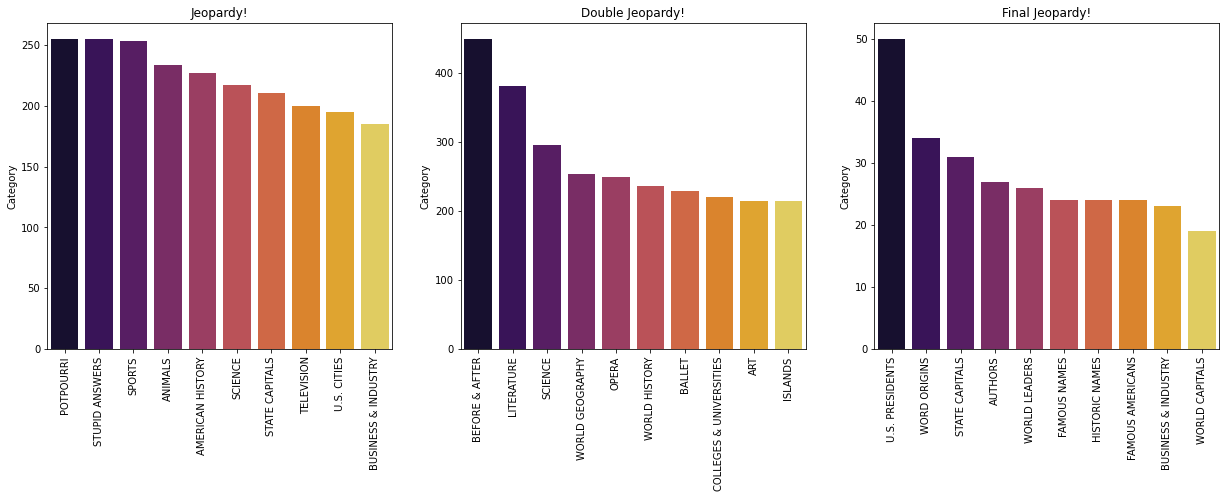

In [16]:
plt.figure(figsize=(21,6))
for i, round in enumerate(jeo.Round.unique()[:-1],1):
    filtered = jeo[jeo.Round == round].Category.value_counts().nlargest(10)
    plt.subplot(1,3,i)
    plt.title(round)
    sns.barplot(x=filtered.index, y=filtered, palette='inferno')
    plt.xticks(rotation=90)

In [17]:
dfs = [jeo[jeo.Round == 'Jeopardy!'].Category.value_counts(normalize=True).rename('Jeopardy'),
jeo[jeo.Round == 'Double Jeopardy!'].Category.value_counts(normalize=True).rename('Double Jeopardy'),
jeo[jeo.Round == 'Final Jeopardy!'].Category.value_counts(normalize=True).rename('Final Jeopardy')]



categories = pd.concat(dfs, join='inner', axis=1).fillna(0)
categories

,Jeopardy,Double Jeopardy,Final Jeopardy
SPORTS,0.002356,0.000765,0.002203
ANIMALS,0.002170,0.000746,0.003305
AMERICAN HISTORY,0.002114,0.001643,0.004682
SCIENCE,0.002021,0.002795,0.001652
STATE CAPITALS,0.001956,0.000689,0.008538
...,...,...,...
WESTERNS,0.000037,0.000094,0.000275
POP STARS,0.000037,0.000047,0.000551
HEALTH & FITNESS,0.000028,0.000076,0.000275
SATIRE,0.000028,0.000047,0.000275


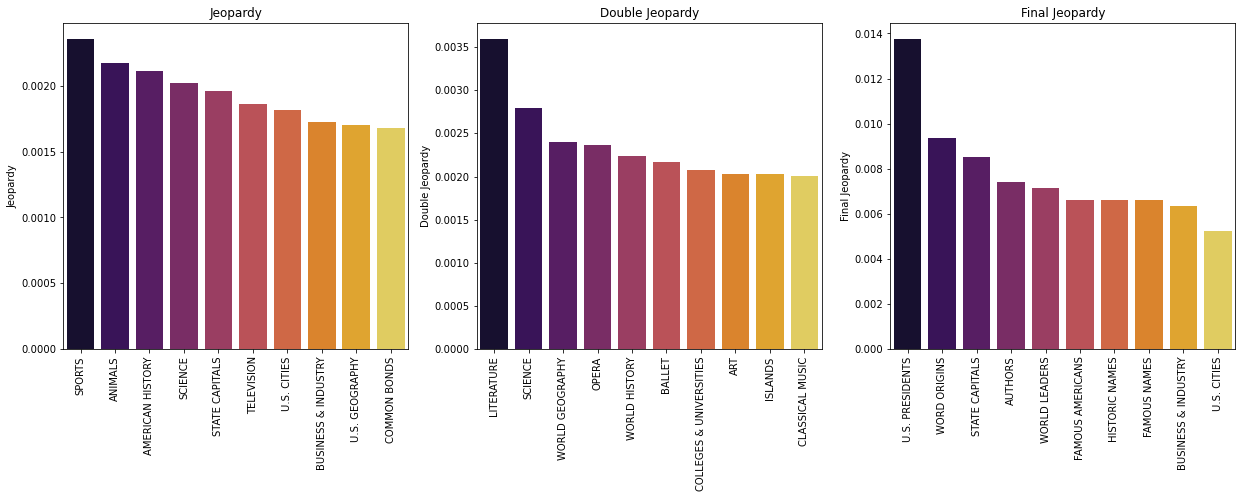

In [28]:
plt.figure(figsize=(21,6))
for i, col in enumerate(categories.columns,1):
    filtered = categories[col].sort_values().nlargest(10)
    plt.subplot(1,3,i)
    plt.title(col)
    sns.barplot(x=filtered.index, y=filtered, palette='inferno')
    plt.xticks(rotation=90)